# 1. Cài đặt thư viện

In [ ]:
%pip install imageio
%pip install scipy
%pip install scikit-image

# 2.1 Nạp ảnh sử dụng thư viện
Python Imgage Library (PIL)

In [20]:
from PIL import Image
import numpy as np
img  = Image.open('bird.png')
img.show()

# 2.2 Nạp ảnh và dùng lệnh thư viện imageio 

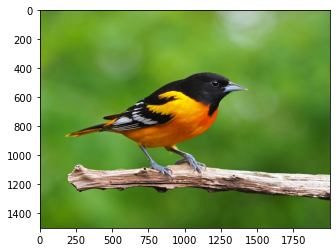

(1500, 2000, 3)

In [1]:
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()
data.shape

# 2.3 Độ phân giải ảnh
Viết chương trình nạp ảnh màu chuyển sang gray scale

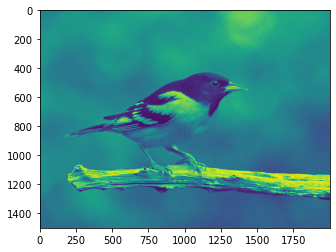

In [ ]:
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
data = iio. imread('bird.png', mode='F')  
plt.imshow(data)
plt.show()

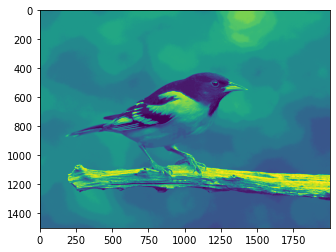

In [ ]:
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png',cl)
tmp=iio.imread('birdf0.png')
plt.imshow(tmp)
plt.show()

# 2.4 Màu sắc với hệ RGB

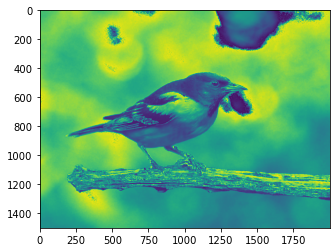

In [18]:
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

# 2.5 Màu Sắc với hệ HSV

In [20]:
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
import colorsys

a=colorsys.rgb_to_hsv(255,0,0)
print(a)
b=colorsys.rgb_to_hsv(1,0,0)
print(b)
c=colorsys.hsv_to_rgb(0,255,0)
print(c)
d=colorsys.hsv_to_rgb(1,1,255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0, -0.0, -0.0)
(255, 0.0, 0.0)


# 2.6 Ứng dụng chuyển đổi hệ màu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


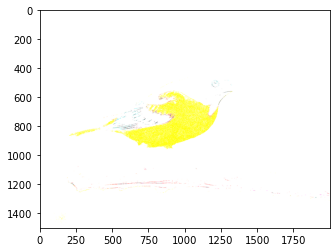

In [21]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()


# 3. Bài Tập

1. Nạp ảnh 3 màu khác nhau

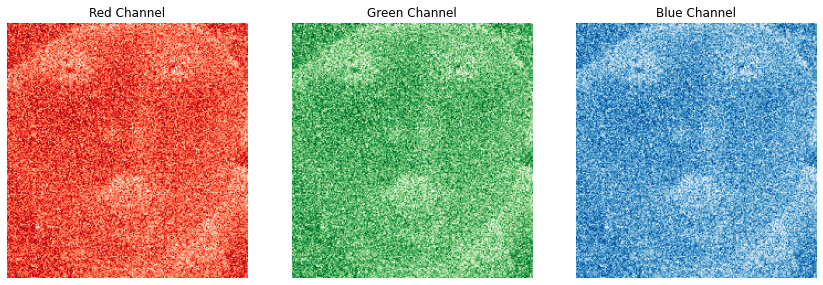

In [ ]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

data = iio.imread('baby.jpeg')

plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.imshow(data[:, :, 0], cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data[:, :, 1], cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(data[:, :, 2], cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.tight_layout()
plt.show()


2. Nạp ảnh hoán đổi giá trị màu

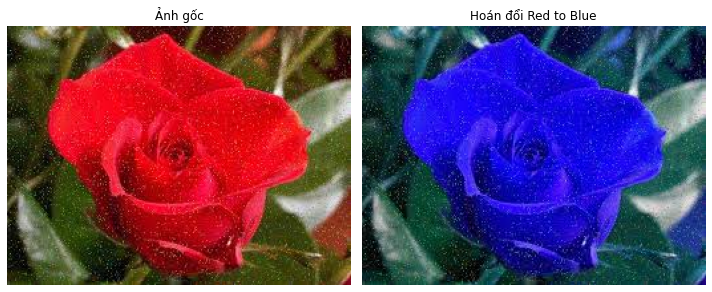

In [48]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

data = iio.imread('flower.jpeg')

swapped = data.copy()
swapped[:, :, 0], swapped[:, :, 2] = data[:, :, 2], data[:, :, 0]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(swapped)
plt.title("Hoán đổi Red to Blue")
plt.axis('off')

plt.tight_layout()
plt.show()

iio.imwrite('flower_doi.jpg', swapped)


3. Nạp ảnh chuyển hệ màu sang HSV, Và lưu 3 ảnh với 3 màu khác nhau

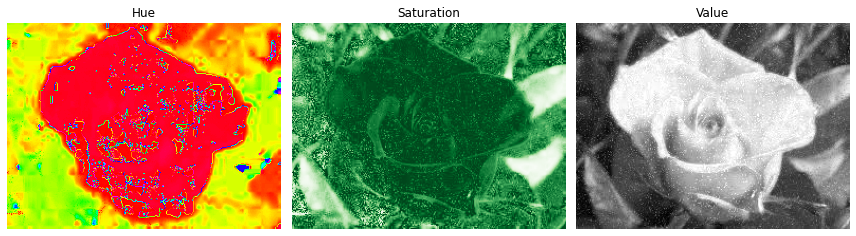

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Hue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='Greens')
plt.title('Saturation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.tight_layout()
plt.show()


4. viết chương trình nạp 1 ảnh, chuyển sang hệ màu hsv lưu ảnh mới với kênh H new=1/3 H old, V new  = 3/4 V old

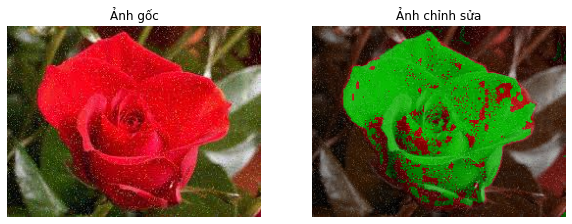

In [47]:
import imageio.v2 as imageio
import cv2
import matplotlib.pyplot as plt

data = imageio.imread('flower.jpeg')
data_bgr = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)
data_hsv = cv2.cvtColor(data_bgr, cv2.COLOR_BGR2HSV)

data_hsv[:, :, 0] = (data_hsv[:, :, 0] * (1/3)).astype('uint8')
data_hsv[:, :, 2] = (data_hsv[:, :, 2] * (3/4)).astype('uint8')

modified_bgr = cv2.cvtColor(data_hsv, cv2.COLOR_HSV2BGR)
modified_rgb = cv2.cvtColor(modified_bgr, cv2.COLOR_BGR2RGB)

imageio.imwrite('flower_chuyen.jpg', modified_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(data)
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(modified_rgb)
plt.title('Ảnh chỉnh sửa')
plt.axis('off')

plt.show()
